

---



---


#  Projeto de Ciência de Dados com Inteligência Artificial


---



---

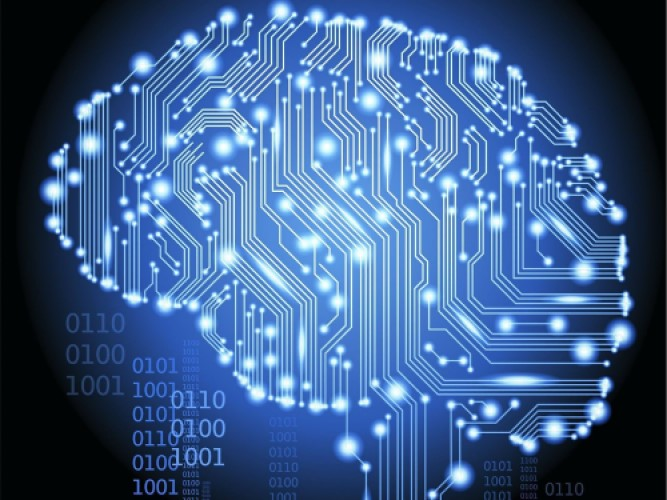

## Dados Farmacológicos

> A base de dados em questão possui dados de pesquisa farmacológica coletados desde aproximadamente 1950, segue a exploração dos dados:










In [1]:
import pandas as pd

url_dados = "https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true"

dados = pd.read_csv(url_dados, compression = "zip")
display(dados)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

### Cada linha representa uma cultura de célula, assim como os dados coletados através das pesquisas, etc.

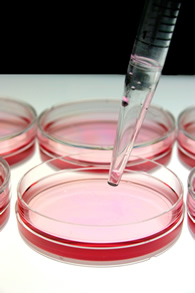

In [2]:
print("Na coluna tratamento temos as categorias:", dados["tratamento"].unique())
print("Na coluna tempo temos:", dados["tempo"].unique())
print("Na coluna dose temos:", dados["dose"].unique())
print("Nas colunas 'g' temos:", dados["g-0"].unique())

Na coluna tratamento temos as categorias: ['com_droga' 'com_controle']
Na coluna tempo temos: [24 72 48]
Na coluna dose temos: ['D1' 'D2']
Nas colunas 'g' temos: [ 1.062   0.0743  0.628  ...  0.3942  0.666  -0.8598]


## No tratamento com controle o que procura-se fazer é isolar uma variável, separando o grupo em duas vertentes: 

-> Grupo de Tratamento:

> Onde o fator testado é aplicado

-> Grupo de Controle:

> Onde o fator testado não sofre interferência

### o que é testado é exposto por 24, 48 ou 72 horas

### existem doses D1 e D2

###As colunas 'g' possuem expressões genéticas, detalhando:



> As células possuem seu citoplasma, onde se encontra seu núcleo, com o DNA...Os genes são trechos desse DNA, que possuem uma 'receita' para sintetizar uma proteína p. e.  para isso ele precisa de um RNA mensageiro pois essa proteína será sintetizada fora do núcleo. Sobre as expressões genéticas temos que: uma determinada célula em condições normais produz 4 RNA's, então dezemos que essa expressão genética é 1x, mas pode ser que essa célula receba um estímulo interno ou externo onde ela produz 8 RNA's, portanto dizemos que essa expressão genética aumentou 2x, e temos estímulos em que a célula produz por exemplo 2 RNA's, a expressão genética seria 0.5... Exemplo do dia-a-dia: a produção de insulina no nosso corpo quando estamos sem nos alimentar (com um pouco de fome p.e.), é devido a um gene que produz uma expressão genética mais baixa, digamos que aí você se alimente e seu corpo produza mais insulina, esse aumento de produção se dá pelo aumento da expressão genética desse gene do seu DNA que possui a 'receita' para a produção de insulina.


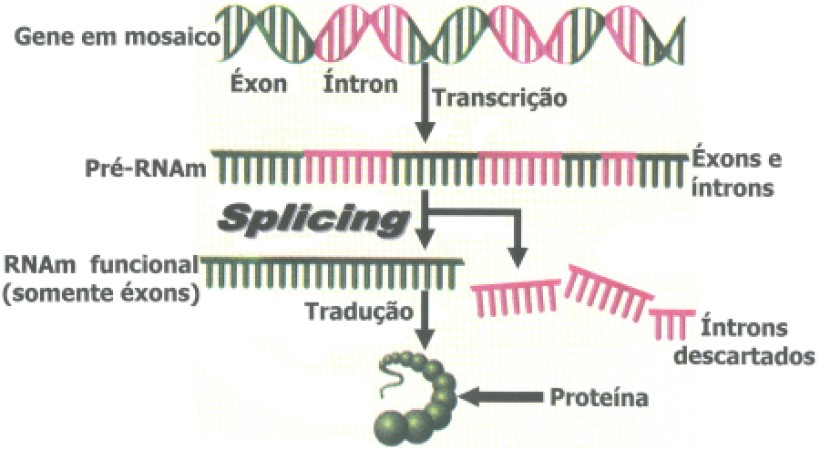






No nosso caso o estímulo é feito com drogas... Os valores na base de dados estão normalizados.

In [3]:
dados["tratamento"].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

## Tratamento com droga e com controle, por que tanta diferença?


> Os experimentos feitos com controle são células de controle onde não foram colocados nenhum fármaco... como a nossa pesquisa se baseia e ver reações à fármacos temos muito mais dados de reações a drogas, pois em cada tipo específico de célula de controle foram experimentados os mais diversos tipos de fármacos.Isso visa/é devido:


1.   Validade Estatística.
2.   Determina valores mínimos de tamanho de amostra.
3.   Diferente da engenharia, onde a tolerância dimensional costuma ser bastante restrita (na ordem de micrômetros), em bioestatística indivíduos podem ser considerados saudáveis mesmo apresentando valores de índices bastante diferentes entre si.
4.   Essa ampla tolerância contribui para que as amostras sejam pequenas.





In [4]:
print(dados["droga"].value_counts(normalize = True))

cacb2b860    0.078357
87d714366    0.030150
9f80f3f77    0.010330
8b87a7a83    0.008524
5628cb3ee    0.008482
               ...   
ddb7e0c01    0.000042
91a585117    0.000042
32dccc366    0.000042
c5ffd58ca    0.000042
6bb340664    0.000042
Name: droga, Length: 3289, dtype: float64


## Quantos tipos de drogas foram investigadas?



> Temos 3289 Drogas pesquisadas, conforme acima.



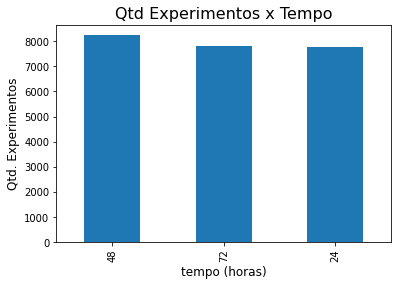

In [5]:
import matplotlib.pyplot as plt

graph1 = dados["tempo"].value_counts().plot.bar()
graph1 = plt.title("Qtd Experimentos x Tempo", fontsize = 16)
graph1 = plt.ylabel("Qtd. Experimentos", fontsize = 12)
graph1 = plt.xlabel("tempo (horas)", fontsize = 12)
graph1 = plt.show()

Acima estão especificados a quantidade de experimentos que foram feitos nos períodos respectivamente de 24, 48 e 72 horas

A seguir temos a proporcionalidade entre tratamentos com droga e com controle, assim como entre doses (2º Gráfico abaixo)

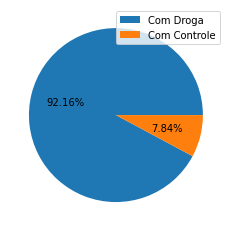

In [6]:
plt.pie(dados["tratamento"].value_counts(), autopct = "%1.2f%%")
plt.legend(labels = ["Com Droga", "Com Controle"], loc = "best")
plt.show()

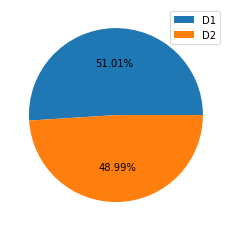

In [7]:
plt.pie(dados["dose"].value_counts(), autopct = "%1.2f%%")
plt.legend(labels = ["D1", "D2"], loc = "best")
plt.show()

Agora prosseguiremos com uma filtragem da coluna g-o para que seja armazenado em uma variável apenas os valores obtidos que foram maiores que zero.

In [14]:
dados_filtradosg0 = dados[dados["g-0"] > 0] #equivalente ao query
print(dados_filtradosg0)

                 id    tratamento  tempo dose  ...    c-96    c-97    c-98    c-99
0      id_000644bb2     com_droga     24   D1  ... -0.3981  0.2139  0.3801  0.4176
1      id_000779bfc     com_droga     72   D1  ...  0.1522  0.1241  0.6077  0.7371
2      id_000a6266a     com_droga     48   D1  ... -0.6417 -0.2187 -1.4080  0.6931
6      id_001bd861f     com_droga     24   D2  ...  2.4670  0.0357  0.1351 -0.3179
7      id_0020d0484     com_droga     48   D1  ...  0.6633  0.4562 -0.9622  0.0260
...             ...           ...    ...  ...  ...     ...     ...     ...     ...
23807  id_fff7e6992     com_droga     48   D1  ...  0.3738  0.8636  0.4494  0.1218
23808  id_fff8c2444     com_droga     72   D1  ... -0.7415  0.8413 -0.4259  0.2434
23809  id_fffb1ceed     com_droga     24   D2  ...  0.0631  0.9171  0.5258  0.4680
23811  id_fffc1c3f4  com_controle     48   D2  ...  0.2256  0.7592  0.6656  0.3808
23812  id_fffcb9e7c     com_droga     24   D1  ...  0.1732  0.7015 -0.6290  0.0740

[11

Até aqui ja podemos observar como essa base de dados oferece uma ampla gama de experimentos com os mais diversos genes, assim como tratamentos e doses, constáta-se por exemplo que cada experimento assim como cada droga possui mais de 800 colunas de dados coletados, temos cerca de 20 milhões de dados puros coletados de maneira empírica. Podendo assim, ter uma idéia do que podemos fazer manipulando esses dados, cruzando informações, utilizando Inteligência Artifial etc.

Obs: As Drogas aqui tratadas são compostos de moléculas induzidos em culturas de células e a maioria delas ainda estão em teste, ou seja, ainda não existe no mercado.Os resultados ainda devem ir para teste em laboratório, depois para pré-clínico, é um processo bem longo porém deve ser ressaltado que são novidade, que futuramente muito possivelmente serão novos medicamentos.

In [9]:
mapa = {"droga": "composto"}
dados.rename(columns = mapa, inplace = True)
display(dados)

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4

In [10]:
top_compostos = dados["composto"].value_counts().index[0:20]
compostos_filtrados = dados.query("composto in @top_compostos")

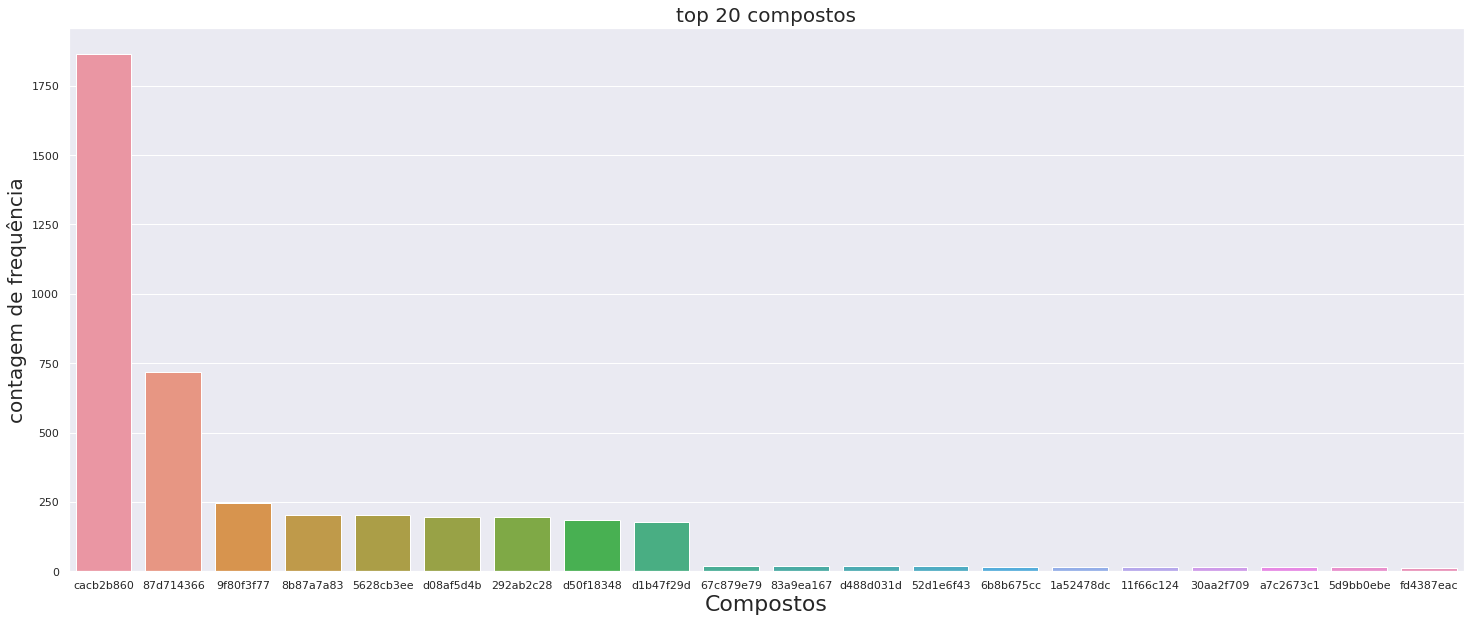

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (25 , 10))
sns.set()
ax = sns.countplot(x = "composto", data = compostos_filtrados, order = top_compostos)
ax.set_title("top 20 compostos", fontsize = 20)
ax.set_xlabel("Compostos", fontsize = 22)
ax.set_ylabel("contagem de frequência", fontsize = 20)
plt.show()

In [24]:
print("Temos ", len(dados["g-0"]), " dados, na coluna g-0")
print("Dos quais ", len(dados["g-0"].unique()), " são valores não repetidos")

Temos  23814  dados, na coluna g-0
Dos quais  14367  são valores não repetidos


### Os valores máximos e mínimos, ou seja a variação de resultados dentro da coluna g-0 variam da seguinte forma:

In [26]:
dados["g-0"].max()

10.0

In [27]:
dados["g-0"].min()

-5.513

### Para melhor Visualização desse tipo de informação fazemos um histograma:

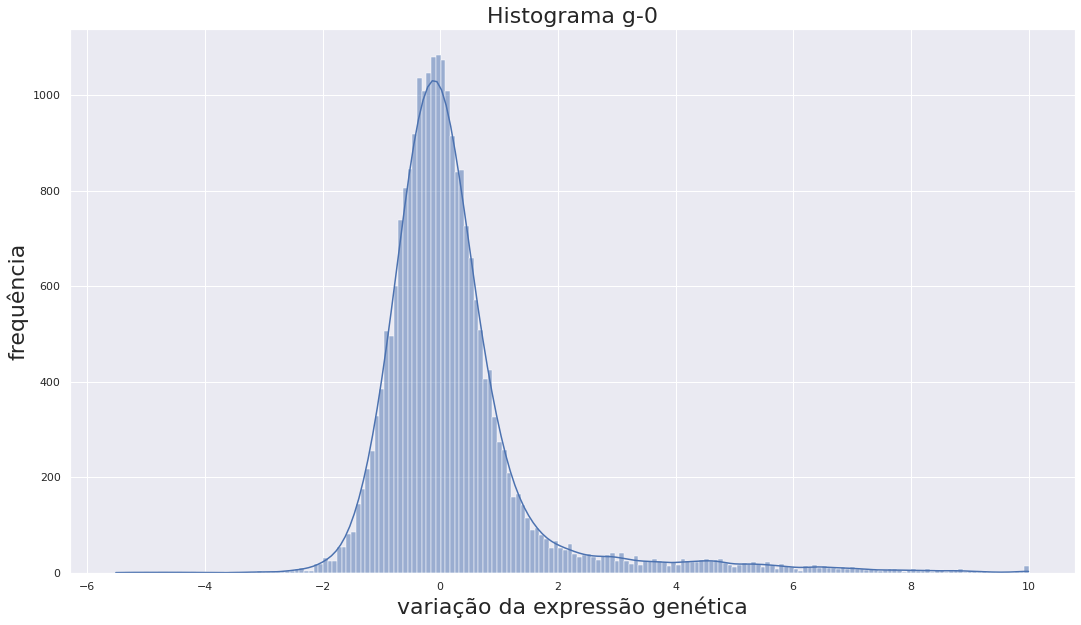

In [58]:
plt.figure(figsize = (18, 10))
hist1 = sns.histplot(x='g-0', data=dados, binwidth = 0.08, kde = True)
hist1.set_title("Histograma g-0", fontsize = 22)
hist1.set_xlabel("variação da expressão genética", fontsize = 22)
hist1.set_ylabel("frequência", fontsize = 22)
plt.show()

### Legenda: count = contagem de valores não-nulos em cada coluna
### mean = média dos valores obtidos nos testes
### std = desvio padrão
### min = valor mínimos obtido
### 25% = percentual mais baixo de valores obtidos
### 50% = percentual médio
### 75% = percentual mais alto de valores obtios
### max = valor máximo obtido

In [69]:
dados.loc[:, "g-0" : "g-771"].describe()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950

### Histograma com a média obtida em todos os experimentos com o gene "g-0"

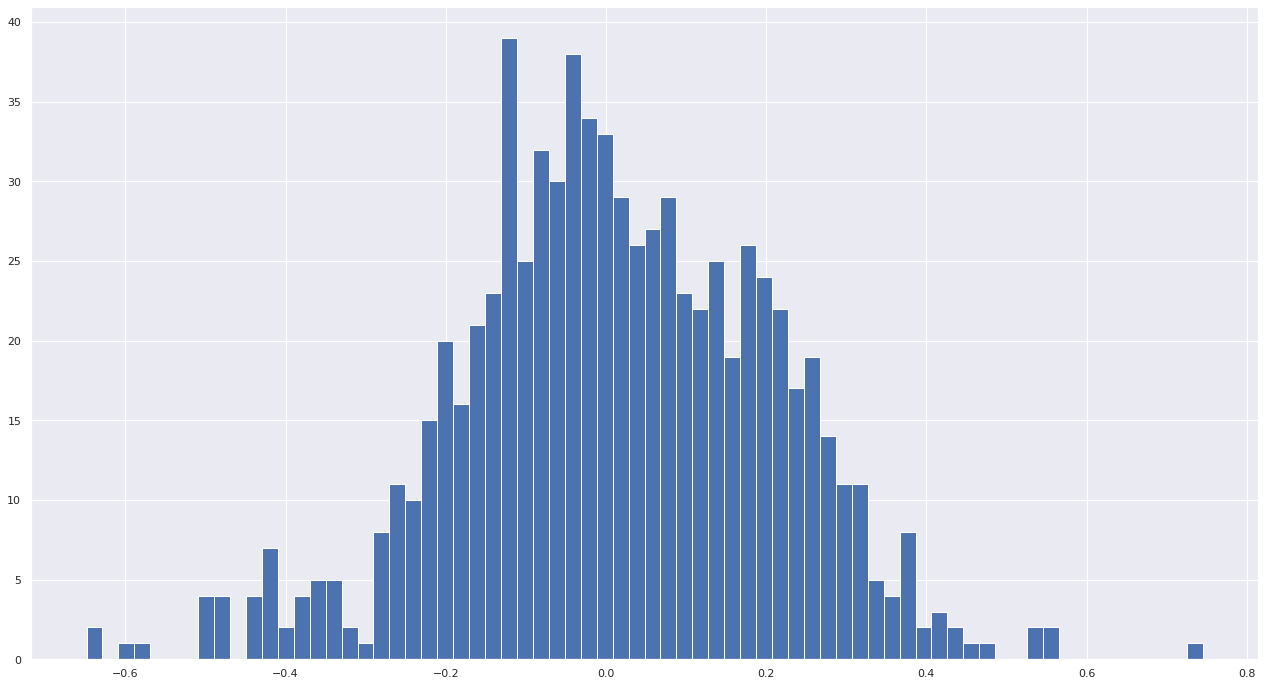

In [80]:
plt.figure(figsize = (22, 12))
hist2 = dados.loc[:, "g-0" : "g-771"].describe().T["mean"].hist(bins = 70)

## Se quiser saber mais sobre esse projeto open-source visite: "https://clue.io/"  Desvende a biologia com o maior dataset do mundo de expressão gênica impulsionada por perturbação.

## Histograma com Média de 'c-0' até 'c-99':

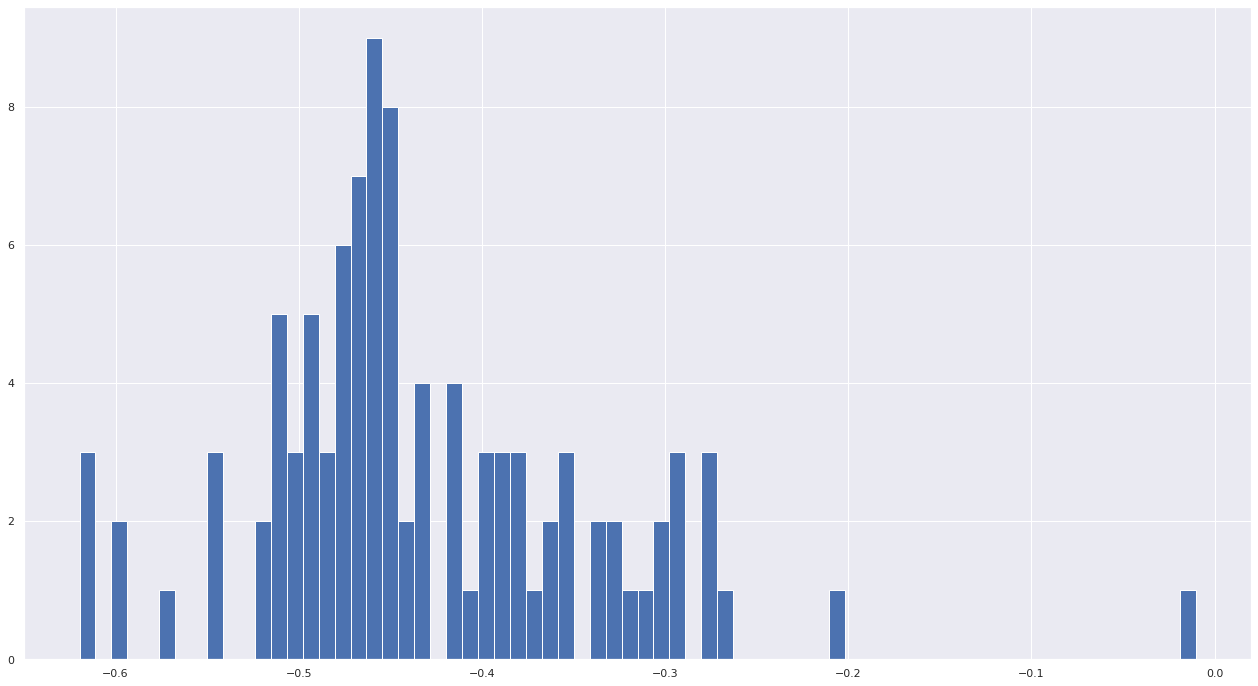

In [85]:
plt.figure(figsize = (22, 12))
hist3 = dados.loc[:, "c-0" : "c-99"].describe().T["mean"].hist(bins = 70)

Obs: cada "c" é uma linhagem celular tanto patogênicas quanto saudáveis
Um exemplo interessante é a Talidomida, quando descoberto esse medicamento era usado para combater enjôo em mulheres grávidas, porém havia um grave efeito colateral nos bebês, hoje, graças as novas técnicas como a usada aqui, que armazena o maior número possível de informações em uma base de dados, e depois as informações são cruzadas, é possível saber se o medicamento afeta alguma outra determinada célula causando um efeito colateral indesejado que o torna inviável, no caso da Talidomida foi descoberto um novo mecanismo de ação, que o torna viável no combate a tumores malignos, porém é necessário acompanhamento durante o uso, além de não estar na condição de gravidez, pois o efeito colateral permanece.

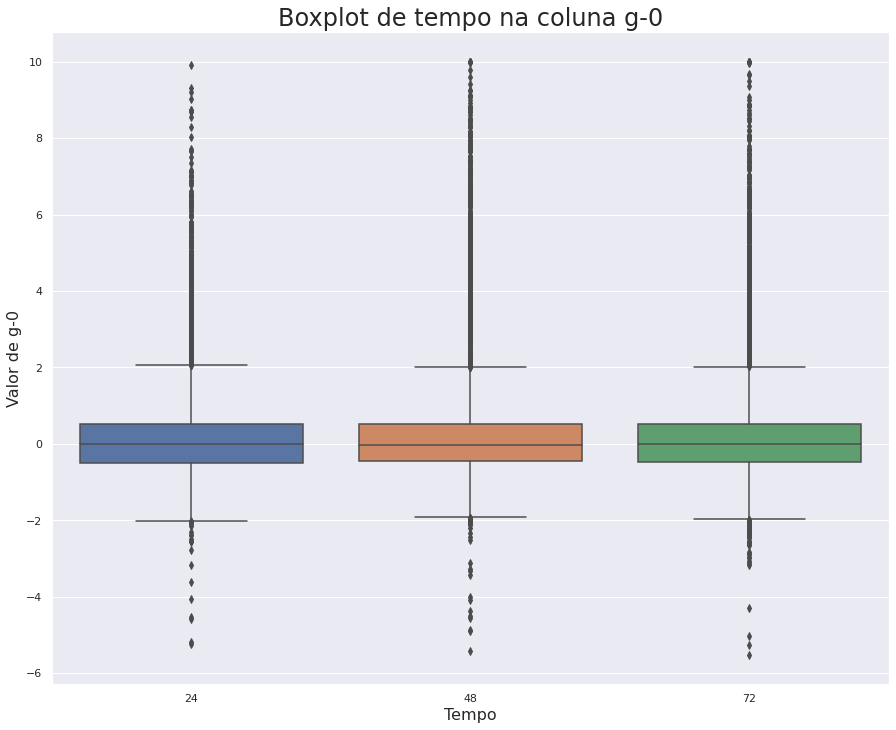

In [87]:
plt.figure(figsize=(15, 12))
ax = sns.boxplot(x='tempo', y='g-0', data=dados)
ax.set_title('Boxplot de tempo na coluna g-0', fontsize=24)
ax.set_xlabel('Tempo', fontsize=16)
ax.set_ylabel('Valor de g-0', fontsize=16)
plt.show()

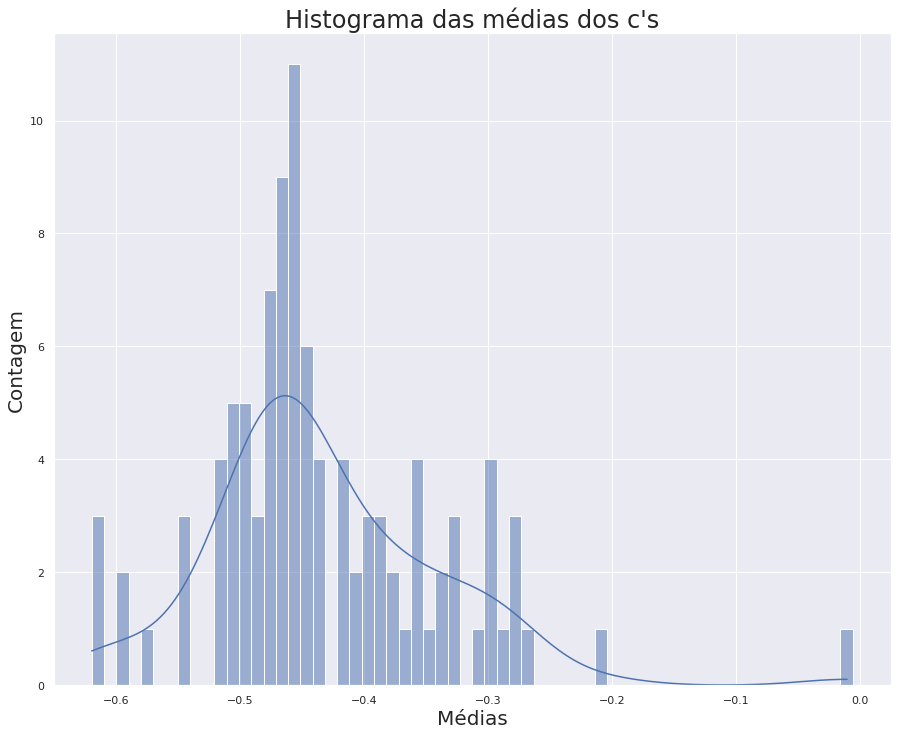

In [95]:
medias_c = dados.loc[:, 'c-0':'c-99'].describe().T['mean']

plt.figure(figsize=(15, 12))
ax = sns.histplot(data=medias_c, binwidth = 0.0099, kde = True)
ax.set_title('Histograma das médias dos c\'s', fontsize=24)
ax.set_xlabel('Médias', fontsize = 20)
ax.set_ylabel('Contagem', fontsize = 20)
plt.show()

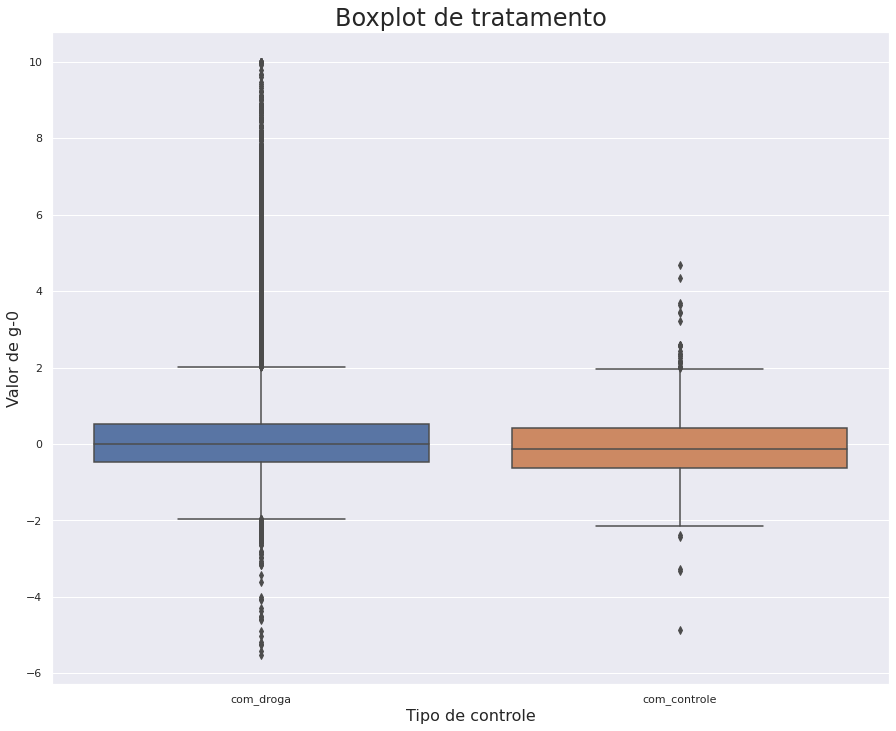

In [99]:
plt.figure(figsize=(15, 12))
ax = sns.boxplot(x='tratamento', y='g-0', data=dados)
ax.set_title('Boxplot de tratamento', fontsize=24)
ax.set_xlabel('Tipo de controle', fontsize=16)
ax.set_ylabel('Valor de g-0', fontsize=16)
plt.show()